##### 
# Linear Classification (Workbook)

### ITCS 5156
### Minwoo "Jake" Lee

# Goal

The goal of this activity is to practice the linearand other simple  classifiers that we learned in class. To do so, we will use the famous [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) where we must classify data samples into their corresponding flower type and [breast cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) where we must detect breast cancer from the collected feature input. Follow the TODO titles and comments to finish the activity! 

# Agenda

* Iris data breakdown
* Iris data visualization 
* Breast cancer data breakdown/visualization
* Classification with
  * Ridge Classifier
  * SGD
  * Perceptron
  * SVM
  * Logistic Regression
  * kNN
  * Naive Bayes
* Multi-class classification with One vs Rest 
  
  

# Tables of TODO's


1. [TODO1 (5 points)](#TODO1) 
2. [TODO2 (10 points)](#TODO2) 
3. [TODO3 (10 points)](#TODO3) 
4. [TODO4 (5 points)](#TODO4)  
5. [TODO5 (5 points)](#TODO5) 
6. [TODO6 (5 points)](#TODO6) 
7. [TODO7 (5 points)](#TODO7) 
8. [TODO8 (5 points)](#TODO8) 
9. [TODO9 (5 points)](#TODO9) 
10. [TODO10 (10 points)](#TODO10) 
12. [TODO11 (10 points)](#TODO11) 
13. [TODO12 (10 points)](#TODO12) 
13. [TODO13 (13 points)](#TODO13) 
18. [Feedback (2 points)](#TODO18) 

Well, let us start the lab with importing the common libraries first. 

In [1]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Data Visualization
## Iris dataset breakdown
The data we are going to be using for this lab is the famous iris dataset. This dataset is a frequently used dataset when first being introduced to classification in machine learning. Famous datasets like this can often be found within machine learning packages, meaning all you have to do is import the dataset via a given package. For instance, Scikit Learn (sklearn) already has the iris dataset built into its library. All we need to do is simply import it! 

If you are not familiar to the iris dataset try reading up on it on the UCI website: https://archive.ics.uci.edu/ml/datasets/iris.

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg)

Let's import the iris dataset using the imported `load_iris()` function and store the output into a variable called `iris`.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

Next, let's check the data structure type of the our `iris` variable so we know how to manipulate our data. To do so we can use Pythons built-in function `type()`.

In [3]:
type(iris)

sklearn.utils.Bunch

Hmmm, I don't think we have seen the type `sklearn.utils.Bunch` before. Let's quickly check the output of the `iris` variable. Here we can see the `iris` prints out keys and corresponding data or meta-data (information about our data) for each key.

In [4]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

So, it looks our `iris` variable is an instance of a sklearn object which holds the data and meta-data. No worries, after a little research it looks like we can access our data by accessing the instance variables inside the `iris` instance. It turns out each key seen in the above output is actually an instance variable. Let's remember what the keys of the `iris` instance are by calling `iris.keys()` instead of manually going through the large output above.

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Okay, now we can clearly see the keys. These key are actually the names of instance variables which hold data or meta-data. Let's try accessing this data and meta-data.

We can access the 'data' key of `iris` by treating the it as an instance variable. The following code does this by calling the instance `iris` and adding a dot `.` followed by the instance variable name, in this case `data`. 

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Let's check the data structure type of `iris.data`.

In [7]:
type(iris.data)

numpy.ndarray

Hey, look at that! `iris.data` returns the data in the form of a Numpy array. This means we can manipulate this data just like we have in previous labs! Now that we know that `iris.data` is a Numpy array let's check the shape of our data.

In [8]:
iris.data.shape

(150, 4)

Nice, we can see we have 150 data samples (rows) and 4 features (columns). 

Let's now check the labels of our features (columns). 

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Here can see the feature names, where each feature name represents the name of a column in the `iris.data` output. For instance, the first column `iris.data[0]` corresponds to 'sepal length' while the second column  `iris.data[1]` corresponds to `sepal width`. 

Finally, let's take a look at the target data.

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Ah, here we can see the targets for each of our data samples (rows). It seems that there are 3 classes: 0, 1, and 2. 

Let's next check the data structure type of `iris.target` to make sure it is a Numpy array as well.

In [11]:
type(iris.target)

numpy.ndarray

Awesome, `iris.target` is also a Numpy array. 

Let's next check the number of samples our target `iris.target` has to make sure it matches the number of samples in our data `iris.data`.

In [12]:
iris.target.shape

(150,)

As excepted, `iris.target` does contain the same number of samples. 

The final question is what do the three classes represent? Let's check by accessing the instance variable `target_names` which should tell us the actual names of the targets/classes.

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

There we go, we can see that each class corresponds to a type of flower - as might have been suspected by the name of the dataset! We can see that class 0 corresponds to 'setosa', class 1 corresponds to 'versicolor', and class 2 corresponds to 'virginica'.

Thus, our goal for this dataset will be to classify a data sample based on the 4 features 'sepal length', 'sepal width', 'petal length', 'petal width' into one of the three classes, 'setosa', 'versicolor', 'virginica'!

## Visualization
Now it's time to do some quick visualization to get a better feel for the iris data.

Let's store the iris data into variables to shorten our typing labor. 

In [29]:
X = iris.data
T = iris.target

Just like any visualization we want to see how the features relate to one another. In our case we want to see how the features relate to one anther and how they vary across classes! To do so lets first plot how our sepal features, 'sepal length' and 'sepal width', and observe how they relate. 

Take a second to review the code. You will need to understand it to complete the next TODO!

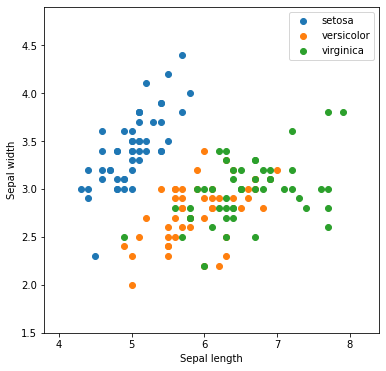

In [15]:
"""
http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Code source: Gaël Varoquaux
Modified for documentation by Jaques Grobler
License: BSD 3 clause
"""
# Get row locations for each class
setosa_locs = np.where(T == 0)[0].astype(int)
versicolor_locs = np.where(T == 1)[0]
virginica_locs = np.where(T == 2)[0]

# Find min and max x-y coordiantes
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(6,6))

# Plot the training points
plt.scatter(X[setosa_locs, 0], X[setosa_locs, 1], label='setosa')
plt.scatter(X[versicolor_locs, 0], X[versicolor_locs, 1], label='versicolor')
plt.scatter(X[virginica_locs, 0], X[virginica_locs, 1], label='virginica')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend() # Plots legend
plt.show()

Interesting! Here we can see that the setosa flower sepal width and length are quite distinguishable from the rest of the classes. It also looks like setosa has a nice linear pattern when it comes to its sepal width and length. Meaning, as the sepal length grows so does the sepal width, typically. On the other hand, the versicolor and virginica flowers sepal features seem to be quite intertwined and more chaotic.

Now, let's see how the petal features relate within and between classes.

<div id="TODO1"></div>

### TODO1 (5 points)
1. Just like above, plot each class but now with respect to petal length (the 3rd feature) and petal width (the 4th feature).
    - Hint: Reuse the three `plt.scatter()` lines from above but now simply change which columns are being indexed!
2. Take a look at the two figures, tell us what they tell us. 

Text(0, 0.5, 'Petal width')

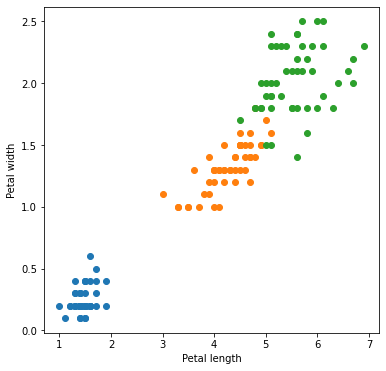

In [16]:
# Get row locations for each class
setosa_locs = np.where(T == 0)[0].astype(int)
versicolor_locs = np.where(T == 1)[0]
virginica_locs = np.where(T == 2)[0]

# Find min and max x-y coordiantes
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5

plt.figure(figsize=(6,6))

# TODO (1): Plot petal width and length for each class
plt.scatter(X[setosa_locs, 2], X[setosa_locs, 3], label='setosa')
plt.scatter(X[versicolor_locs, 2], X[versicolor_locs, 3], label='versicolor')
plt.scatter(X[virginica_locs, 2], X[virginica_locs, 3], label='virginica')

plt.xlabel('Petal length')
plt.ylabel('Petal width')


`TODO1.2` Take a second to think about what this plot is telling us.



`Answer` 

This tells us that petal length and width seperate the classes more

If you’re thinking that all classes seem relatively separable when only looking at the petal features you’re on the right track! There is a slight exception with versicolor and virginica as their sepal features slightly overlap. If you’re also thinking that all the classes show a linear trend you're also on the right track. Each flower petal width seems to grow with petal length.

## Breast Cancer Wisconsin dataset breakdown

Another popular classification data is breast cancer dataset from Clinical Sciences Center, Madison, WI. The computed features from a disgitized image of a fine needle aspirate (FNA) of a breast mass include radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. You can acces the detailed description and relevant papers from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic). 

Scikit Learn (sklearn) has the brest cancer dataset built into its library, so you don't need to download the file. 

![](https://archive.ics.uci.edu/ml/assets/MLimages/Large14.jpg)

<div id="TODO2"></div>

### TODO2 (10 points)

1. Using `load_breast_cancer` in Scikit-Learn, load the data into `cancer`.
2. Create a pandas DataFrame that contain both `cancer.data` and `cancer.target` with a proper column names and store to `df_breast`.
  * HINT: use `np.hstack` to combine the arrays
3. `display` the first 5 rows of the `df_breast` using `head` method. 


In [17]:
from sklearn.datasets import load_breast_cancer

# TODO (1)
cancer = load_breast_cancer()

# TODO (2)
df_breast = pd.DataFrame(np.hstack((cancer.data,np.reshape(cancer.target,(-1,1)))),columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry' ,'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension','diagnosis'])
# TODO (3)
print(df_breast.head())

print("Target Label: ", end="")
print(cancer.target_names, np.unique(cancer.target))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

<div id="TODO3"></div>

Skewness measures the symmetry of the distributions. Last week, we observed the skewed target label distributions in the forest fire dataset. Well, we may check skewness of our data as it reveals how the data is sampled. Moreover, linear models learn based on the assumption of similar distributions between input and target.   
You can learn about skewness of a distribution from [here](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/). 

Here are how to read the numbers from skewness values:
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
* If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
* If the skewness is less than -1 or greater than 1, the data are highly skewed



### TODO3 (10 points)

1. Using Pandas `describe`, take a look at the summary of the data.
2. Using Pandas `skew`, take a look at the skewness of the data.
3. Do you have any bare observation from here?


In [18]:
df_breast.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [19]:
df_breast.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

`TODO3.3` What do you observe from the summary and skewness measure? 

`Answer` 

The data is moderately to extremely skewed in most cases



## Visualization

The breast cancer data is high dimensional, which can be disasterous for data visualization.  

<div id="TODO4"></div>

### TODO4 (5 points)

1. Using the Pandas `scatter_matrix()` function, create a scatter plot using the all 31 features from the `df_breast` dataframe.
  * HINT: by passing `c=` option with the target label, you can present the data with different colors for different labels. 

<font color="red"><b>WARNING: THIS CODE CAN TAKE A LONG TIME TO RUN! </b></font>   
As it compares the all the pairs, it may take long depending on your computing power. Once you get the figure, running this cell multiple times is not a good idea.    

C:\Users\Zachary\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zachary\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zachary\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Zachary\AppData\Roaming\Pytho

array([[<AxesSubplot:xlabel='mean radius', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean smoothness', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean compactness', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean concavity', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean concave points', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean symmetry', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean fractal dimension', ylabel='mean radius'>,
        <AxesSubplot:xlabel='radius error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='texture error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='perimeter error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='area error', ylabel='mean radius'>,
        <AxesSubplot:xlabel='smooth

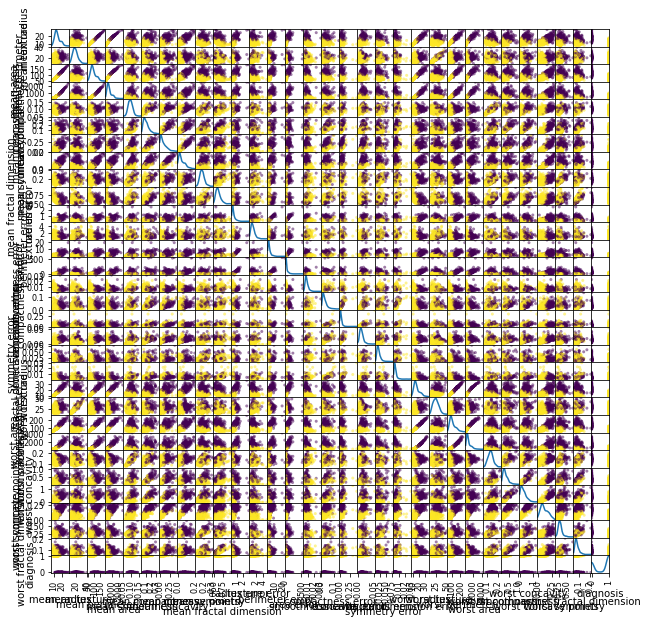

In [20]:
pd.plotting.scatter_matrix(df_breast,c=df_breast.diagnosis,figsize=[10,10],diagonal='kde')

Wow! There are a lot of features. Even x and y label texts overlap, so we can't read! 
However, we can see some input features are dependent to each other (highly correlated). This tells us that some of the features are redundant (so possible reduction). But for now, let us pick some features to zoom in through just simply pikcing up first six features.


<div id="TODO5"></div>

### TODO5 (5 points)
1. Plot the same scatter plot only with the first 6 features. 

C:\Users\Zachary\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zachary\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Zachary\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Zachary\AppData\Roaming\Pytho

array([[<AxesSubplot:xlabel='mean radius', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean smoothness', ylabel='mean radius'>,
        <AxesSubplot:xlabel='mean compactness', ylabel='mean radius'>],
       [<AxesSubplot:xlabel='mean radius', ylabel='mean texture'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean texture'>,
        <AxesSubplot:xlabel='mean perimeter', ylabel='mean texture'>,
        <AxesSubplot:xlabel='mean area', ylabel='mean texture'>,
        <AxesSubplot:xlabel='mean smoothness', ylabel='mean texture'>,
        <AxesSubplot:xlabel='mean compactness', ylabel='mean texture'>],
       [<AxesSubplot:xlabel='mean radius', ylabel='mean perimeter'>,
        <AxesSubplot:xlabel='mean texture', ylabel='mean perimeter'>,
        <AxesSubplot:xlabel='mean perim

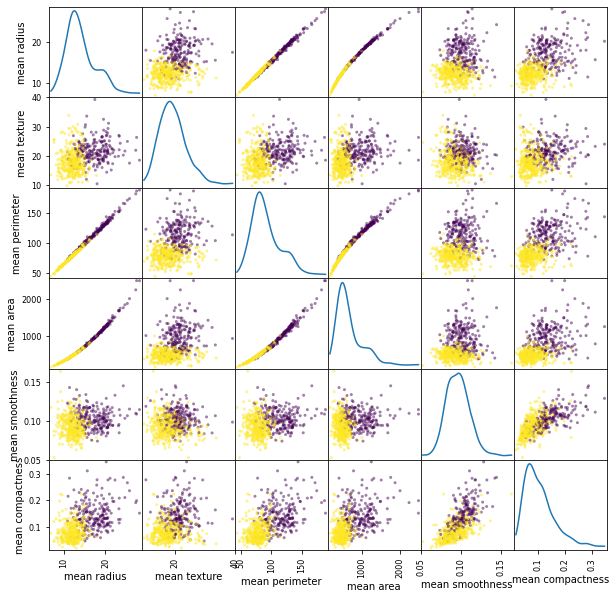

In [21]:
pd.plotting.scatter_matrix(df_breast[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness']],c=df_breast.diagnosis,figsize=[10,10],diagonal='kde')

By zooming to each scatter plot, we can better observe the data. 
However, the diagonal layered kernel density estimate (KDE) with single color for all data is a bit less informative. 
Seaborn pairplot does very similar with the different colors for the diagonal KDE. So, let us try it.


<div id="TODO6"></div>

### TODO6 (5 points)
1. Plot the same scatter plot only by using the Seaborn `pairplot`. 
  * HINT: `hue` is the key to specify the column name for the label. 

* If you don't have [seaborn library installed](https://seaborn.pydata.org/installing.html), you can install it by running 

    <code>pip install seaborn </code>

    or 

    <code>conda install seaborn </code> 



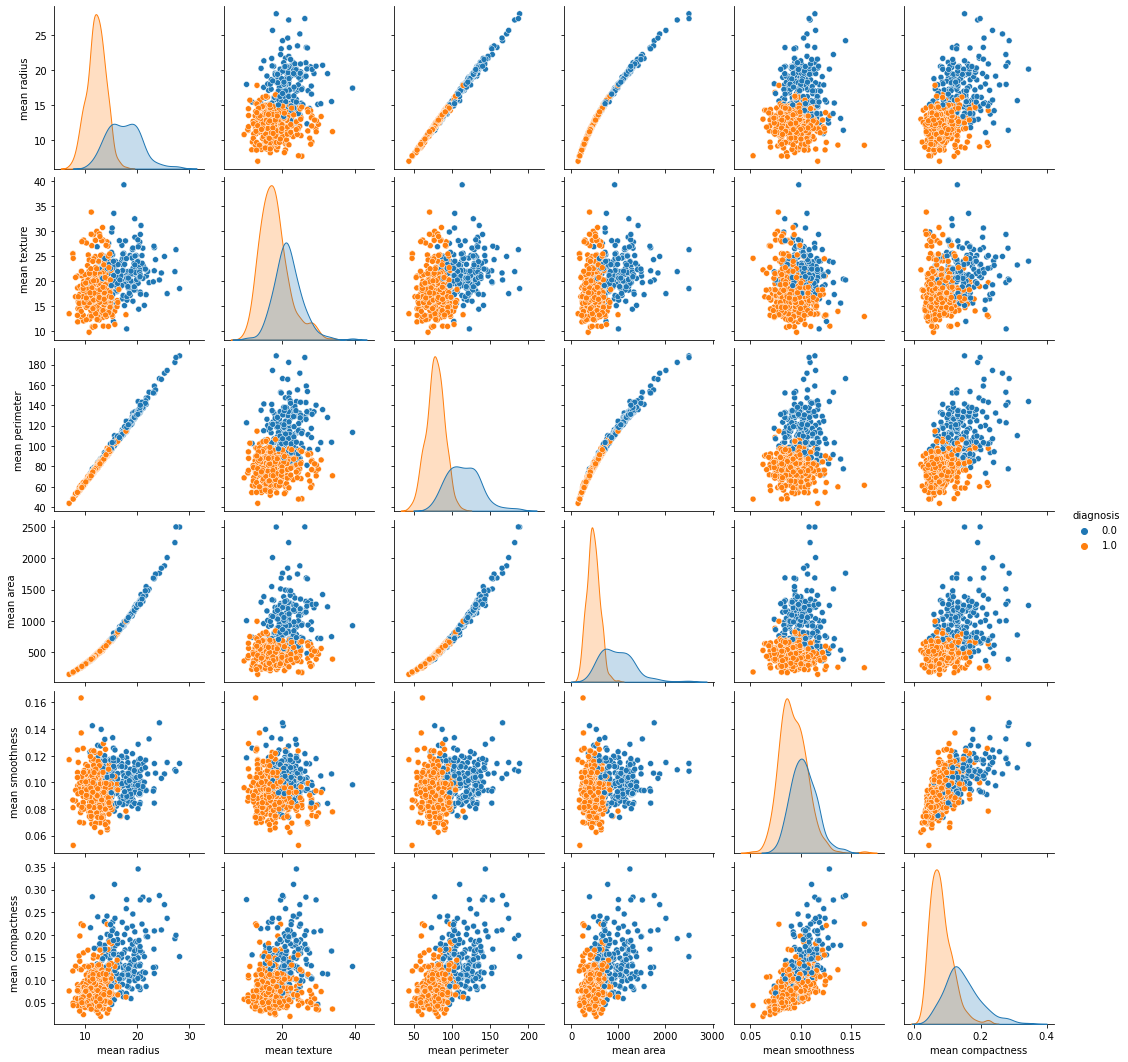

In [23]:
import seaborn as sns

sns.pairplot(df_breast,hue='diagnosis',x_vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness'],y_vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness'])

We now see the zoomed distribution with how the input features are distributed for the twom positive and negative classes. If they are largely overlap, the input feature by itself might not be a good factor to classify the data. I said "by itself" because it might be necessary as it can combine with other feature to form important decision factors.   

# Applying Linear Classification

Now it's time to apply newly learned linear classification algorithms. However, be thinking about the following questions before starting, as your apply the algorithms, and as you analyze the results.

- What do we need to do first to the data before running the algorithms?
- How accurate were the linear classifiers on Iris? 
- How can we quantitatively show this measure of accuracy? 

## Data Partitioning
For the first question if you're thinking that we still need to partition our data, you're correct! As stated, we still need to split the iris and breast cancer data into a training and testing set, as discussed and practiced last week. Remember, this is to simulate seen (train) and unseen (test) data!



<div id="TODO7"></div>

### TODO7 (5 points)

1. Practice iris data partition using Scikit-Learn function. 

NOTE: We will resut the same variable repeated, so the function will be called multiple times in the note. So, if need, compy and paste the code here to where it needs. 

In [30]:
# TODO: import proper library
from sklearn.model_selection import train_test_split

# TODOL partition the iris data

X_train, X_test, t_train, t_test = train_test_split(X,T,test_size=.2)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (120, 4)
Train target shape: (120,)
Test data shape: (30, 4)
Test target shape: (30,)


##  Applying Perceptron Algorithm
The first algorithm we are going to implement is the perceptron algorithm. Recall from our notes that the perceptron algorithm predicts binary classes. The required targets for this algorithm are -1 and 1. This is because the algorithm classifies a data sample as the positive class (target is 1) if the value of the prediction is greater than 0. Likewise, the algorithm classifies a data sample as the negative class (target is -1) if the value of the prediction is less than zero. When the output is exactly zero then it can be unclear to which class the sample belongs to, this is typically a rare event.

We can calculate our prediction by applying the dot product between the current weight vector $w$ and the current data sample vector $x_i$.
\begin{equation}
y = w \cdot x_i
\tag{1}
\end{equation}

We can update our weight vector by taking the element-wise multiplication between the current scalar target $t_i$ and the current data sample vector $x_i$ and then applying our learning-rate $\alpha$ to scale the weight update. Remember that the sign of $t_i$ represents which direction we need to update our weights in!
\begin{equation}
w = w + \alpha t_i x_i
\tag{2}
\end{equation}

### References

- https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975
    - A good blog post to see how all the parts, linear algebra, and calculus, of the perceptron algorithm come together.

### Converting to Binary Classes
Wait a second! How many classes do we have in the iris data? Let's print out the number unique targets below to see how many classes we have. Remember that perceptron only works on binary classification!

In [31]:
np.unique(t_train)

array([0, 1, 2])

Oh no! It has three classes. How can we apply binary classifiers when we have three classes? 

To get around this issue we usually apply binary classifiers multiple times in a one-vs-another classification format. This means we pick one class say setosa to be the positive class and then combine the remaining classes into a singel class,  the negative class. In essences, we are now trying to determine if a given sample is of the positive class setosa or the negative class, where the negative class is anything but setosa. So, if we wanted to classify all the samples into their exact class we'd have perform the aforementioned idea three times, where each class acts as the postive class and the remaining classes act as the negative class.

For this exercise, we will only focus on classifying our data as setosa or not. Once again, this means that setosa acts as our positive class and the remaining two classes, versicolor and  virginica, combine to give us the negative class.

The next few cells represent the code for setting versicolor and virginica to both have the negative class target of -1.

Using the below code we find all locations for the classes versicolor, and virginica. We do so by simply testing for where the targets in `t_train` are above 1. Remember versicolor corresponds to the target 1 and virginica corresponds to the target 2, so we can simply check for where the targets are greater than or equal to 1!

In [32]:
t_train >= 1

array([ True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True, False,  True, False, False,
        True, False,  True])

Next, we use the previous code to index `t_train` only where all the targets are greater than or equal to 1 (this is represented by the 'True' values given in the output above) and then we set these indexed `t_train` targets to -1.

In [33]:
t_train[t_train >= 1] = -1

Now let's take a look at what are class targets are now!

In [34]:
np.unique(t_train)

array([-1,  0])

This is good, we have successfully combined our two classes versicolor and virginica into a single negative class. However, recall that if we want to make a prediction our class targets need to be -1 and 1. This is currently not the case. Let's fix this by setting setosa to have a target of 1, corresponding to the positive class.

In [35]:
t_train == 0

array([False, False,  True,  True,  True, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
        True,  True, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True, False,  True,  True,
       False,  True, False])

In [36]:
t_train[t_train == 0] = 1

We can validate our method work by checking the number of unique targets in `t_train`. As we can see there are now only two targets. One represents our negative class (target equal to -1) which corresponds to versicolor and virginica. The other represents our positive class (target equal to 1) which corresponds to setosa.

In [37]:
np.unique(t_train)

array([-1,  1])

<div id="TODO8"></div>

### TODO8 (5 points)

Let's redo what we did above but now converting our code into a function called `convert_targets()`. Repeat the above target reassignment for `t_train` and now for `t_test` as well.

1. Set the versicolor (target 1) and virginica (target 2) classes in `t_train` to -1
2. Set the setosa class (target 0) in `t_train` to 1
3. Set the versicolor (target 1) and virginica (target 2) classes in `t_test` to -1
4. Set the setosa class (target 0) in `t_test` to 1

In [40]:
def convert_targets(t_train, t_test):
    """ Convert partitioned targets to binary targets formatted for the perceptron algorithm.
        
        Note:
            This operation is an in-place operation which means the passed data 
            values are directly modified when running this function!
    
    """
    # TODO (1) 
    t_train[t_train >= 1] = -1
    # TODO (2)
    t_train[t_train == 0] = 1
    # TODO (3)
    t_test[t_test >= 1] = -1
    # TODO (4)
    t_test[t_test == 0] = 1
    
    return t_train, t_test

Run the below code cell to test if the `convert_targets()` function works! You should seen two unique targets `[-1, 1]` for both the training and testing sets!

In [41]:
X_train, X_test, t_train, t_test = train_test_split(iris.data, iris.target, test_size=0.2)
_, _ = convert_targets(t_train, t_test) # Convert partition targets to be binary
print("Training targets: {}".format(np.unique(t_train)))
print("Test targets: {}".format(np.unique(t_test)))

Training targets: [-1  1]
Test targets: [-1  1]


Now we can define an the function `init_binary()` which will call `train_test_split()` and `convert_targets()` to fully reinitialize our data without needing to restart the notebook or rerun cells! Hopefully this will ensure that we run into less Jupyter errors due to rerunning cells that conflict with one another.

In [42]:
def init_binary(data, test_size=0.2):
    """ Initializes training and testing data and converts targets into binary.
    
        Args:
            data (sklearn.utils.Bunch): A Bunch object that is used to store the data.
            
            test_size (float): Size of test set.
            
        Returns:
            Training and testing data
    
    """
    X_train, X_test, t_train, t_test = train_test_split(data.data, data.target, test_size=test_size)
    _, _ = convert_targets(t_train, t_test)
    
    return X_train, X_test, t_train, t_test
    

## Linear Classifers

Now, let us **classify** the data using the algorithms that we learned. 


<div id="TODO9"></div>

### TODO9 (10 points)

Let us test the binary converted iris target with Perceptron.

1. Create a instance `Perceptron` class. You can pick the best tolerance value (`tol`) that works for the data.
2. Fit your `Perceptron` instance using the train data and labels.
3. Compute the accuracy of the learned classifier using the train/test data and labels.
    - Hint: Try to  `.score()` method
4. Compute the triain and test predictions.
    - Hint: Try using the `.predict()` method
5. Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.
6. Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.

The `.score()` method for classifiers quantifies the results by computing the accuracy as given below: 
$$
  accuracy = \frac{\text{total number of correct classification}} {\text{total number of data samples}}. 
$$

Train Accuracy: 1.0, Test Accuracy: 1.0


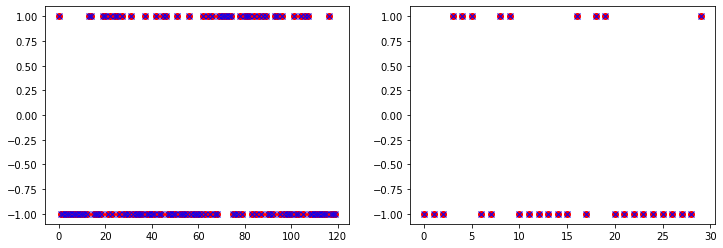

In [44]:
# TODO: Import a proper module
from sklearn.linear_model import Perceptron

# Reinitialize data partitions and covert targets to binary.
# This ensures that rerunning this cell at any point will work.
X_train, X_test, t_train, t_test = init_binary(iris)

# TODO 1:  Create a instance `Perceptron` class
clf = Perceptron()

# TODO 2:  Fit your `Perceptron` instance using the train data and labels.
clf.fit(X_train,t_train)

# TODO 3: Compute the accuracy of the learned classifier using the train/test data and labels.
test_score=clf.score(X_test,t_test)
train_score=clf.score(X_train,t_train)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))


# TODO 4: Compute the triain and test predictions.
y_train = clf.predict(X_train)
y_test = clf.predict(X_test)

plt.figure(figsize=(12,4))
plt.subplot(121)

# TODO 5: Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_train,'ro')
plt.plot(y_train,'bx')


plt.subplot(122)

# TODO 6: Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_test,'ro')
plt.plot(y_test,'bx')



## One-vs-Rest

We manually convert the three target classes into two to make it work with the binary classfier, Perceptron. Well, as we learned in the lecture, the binary classifiers can be easily extended to multi-class classification by using one-vs-rest or one-vs-one manner. Let us practice One-vs-Rest classification using Scikit-Learn. 

<div id="TODO10"></div>

### TODO10 (10 points)

Scikit-Learn OneVsRestClassifier allow you to run multiclass classification by simply wrapping binary classifiers up.
  * You can take a look at the [reference](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html?highlight=onevsrest#sklearn.multiclass.OneVsRestClassifier) for more information. 
  
1. Partition the iris data set using the `train_test_split()` function.
2. Create a `OneVsRestClassifier` instance for Perceptron classification. 
3. Fit the `OneVsRestClassifier` instance using the train data and labels.
4. Compute the accuracy of the learned classifier using the train/test data and labels.
5. Compute the triain and test predictions.
6. Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.
7. Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.

Train Accuracy: 0.9583333333333334, Test Accuracy: 0.9


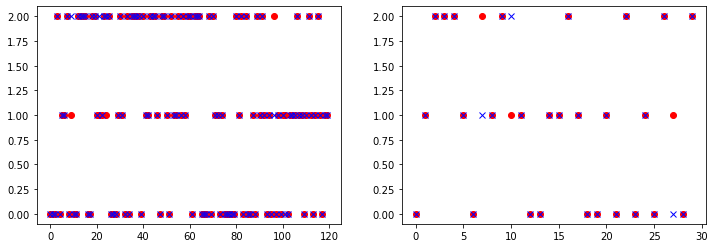

In [50]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Perceptron

# TODO 1: Partition the iris data set using the `train_test_split()` function.
X_train, X_test, t_train, t_test = train_test_split(iris.data, iris.target, test_size=0.2)

# TODO 2: Create a `OneVsRestClassifier` instance for Perceptron classification. 
clf=OneVsRestClassifier(Perceptron())


# TODO 3: Fit the `OneVsRestClassifier` instance using our train data and labels.
clf.fit(X_train,t_train)

# TODO 4:  Compute the accuracy of our learned classifier using the train/test data and labels.
#          Make sure to print the accuracies as the previous TODO
test_score=clf.score(X_test,t_test)
train_score=clf.score(X_train,t_train)
print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))



# TODO 5: Compute the triain and test predictions.
y_train = clf.predict(X_train)
y_test = clf.predict(X_test)



plt.figure(figsize=(12,4))
plt.subplot(121)

# TODO 6: Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_train,'ro')
plt.plot(y_train,'bx')



plt.subplot(122)

# TODO 7: Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.
plt.plot(t_test,'ro')
plt.plot(y_test,'bx')




<div id="TODO11"></div>

Now, let us try all the classifiers that we learned this week to classify the Iris dataset. 

### TODO11 (10 points)

1. Import all the classifier objects for ridge, perceptron, SGD, SVM, logistic regression, KNN, naive bayes. Also import util objects such as `OneVsRestClassifier`, `Pipeline`
2. Create an instance of each classifier object that matches with the variable name to fill in.
3. Create an instance of the `OneVsRestClassifier` passing the current classifier `model`.
4. Fit the `OneVsRestClassifier` instance using the train data and labels with the current classified.
3. Compute the accuracy of the learned classifier using the train/test data and labels.
4. Compute the triain and test predictions.
5. Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.
6. Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.
6. What do you think about the difference between the classifiers in Iris dataset? Which one works best?

In [76]:
# TODO 1
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline












In [77]:
# data partition
X_train, X_test, t_train, t_test = train_test_split(iris.data, iris.target, test_size=0.2)


Ridge
Train Accuracy: 0.85, Test Accuracy: 0.7666666666666667
Perceptron
Train Accuracy: 0.9, Test Accuracy: 0.8
SGD
Train Accuracy: 0.9166666666666666, Test Accuracy: 0.9666666666666667
SVM
Train Accuracy: 0.975, Test Accuracy: 0.9666666666666667
Logistic Reg
Train Accuracy: 0.9416666666666667, Test Accuracy: 0.9333333333333333
kNN
Train Accuracy: 0.9666666666666667, Test Accuracy: 0.9666666666666667
Naive Bayes
Train Accuracy: 0.9416666666666667, Test Accuracy: 0.9333333333333333


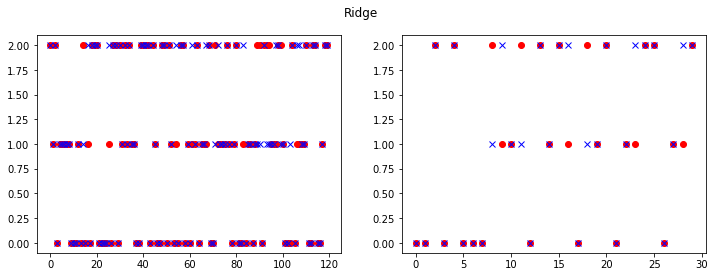

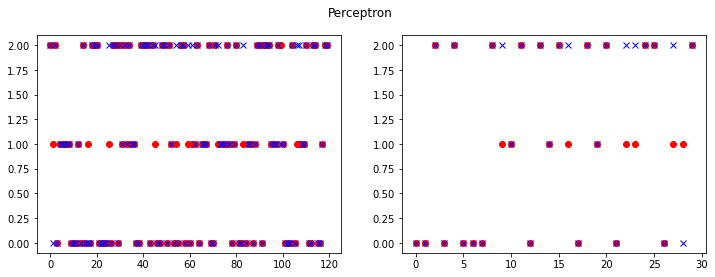

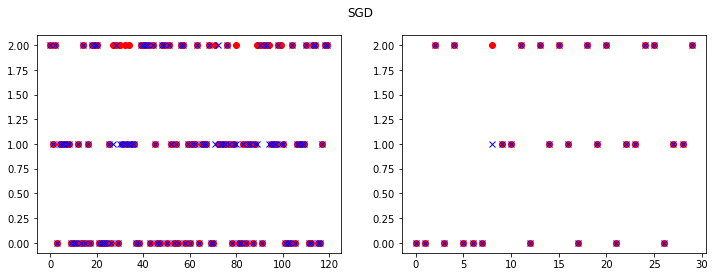

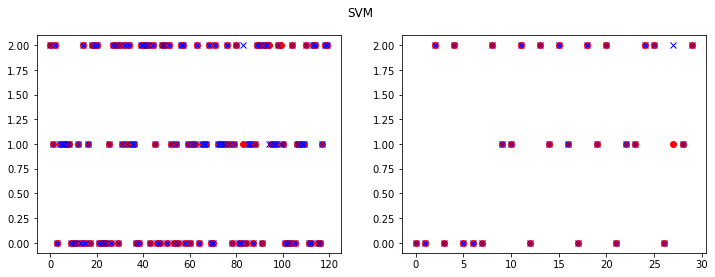

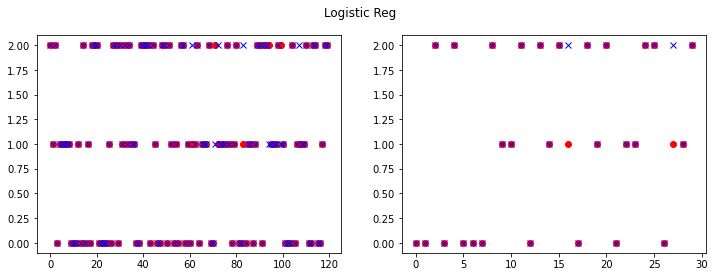

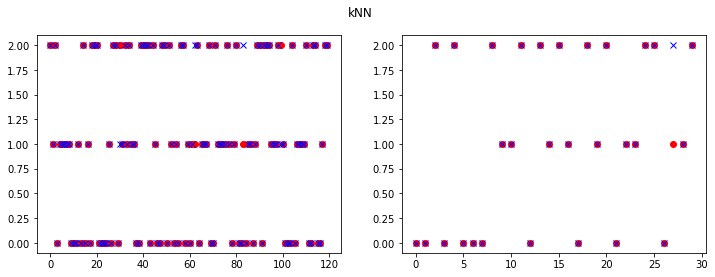

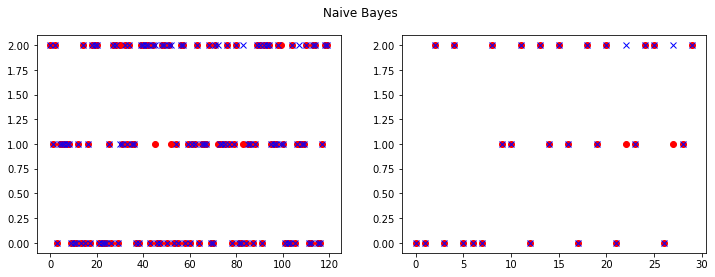

In [78]:
# TODO 2
ridge = Ridge()
perceptron = Perceptron()
sgd = SGDClassifier()
svm = SVC()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
nb = naive_bayes.GaussianNB()

# list of algorithms to test
models = [ ridge, perceptron, sgd, svm, logreg, knn, nb]
# list of algorithm names 
names = ["Ridge", "Perceptron", "SGD", "SVM", "Logistic Reg", "kNN", "Naive Bayes"]


for name, model in zip(names, models):
    print(name)
    
    # TODO 3:
    clf =Pipeline([('StandardScaler',StandardScaler()),(name,OneVsRestClassifier(model))])

    # TODO 4:
    clf.fit(X_train,t_train)
    
    # TODO 5:
    test_score=clf.score(X_test,t_test)
    train_score=clf.score(X_train,t_train)
    print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))
    
    
    
    # TODO 6:
    y_train = clf.predict(X_train)
    y_test = clf.predict(X_test)

    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    # TODO 7:

    plt.plot(t_train,'ro')
    plt.plot(y_train,'bx')
    
    
    plt.subplot(122)
    # TODO 8:

    plt.plot(t_test,'ro')
    plt.plot(y_test,'bx')
    
    plt.suptitle(name)

`TODO11.5` What do you think about the difference between the classifiers in Iris dataset? Which one works best?

`ANSWER`
Overall the only difference to note is ridge is by far the worst. SVM is the best

Wait. Here we have some classifiers that are Inherently multiclass. Without using the OneVsRest wrapper, let us directly train it to train on the tri-class classification. 

<div id="TODO12"></div>

Among all the classes above, which ones are Inherently multiclass? 

### TODO12 (10 points)

1.  Create your own list of models to be used for multiclass classifiers and store them into the `models` variables. Create a corresponding list of names that contains the names of each of your classifiers and store the output into the variable `names`.
 * Hint: There are four Inherently multiclass. 
2. Fit the current `model` using the train data and labels.
3. Compute the accuracy of the learned classifier using the train/test data and labels.
4. Compute the triain and test predictions.
5. Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.
6. Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.
7. Do you observe any difference? What do you think about the results? 

SVM
Train Accuracy: 0.975, Test Accuracy: 0.9666666666666667
Logistic Reg
Train Accuracy: 0.975, Test Accuracy: 0.9666666666666667
kNN
Train Accuracy: 0.9666666666666667, Test Accuracy: 0.9666666666666667
Naive Bayes
Train Accuracy: 0.9583333333333334, Test Accuracy: 0.9333333333333333


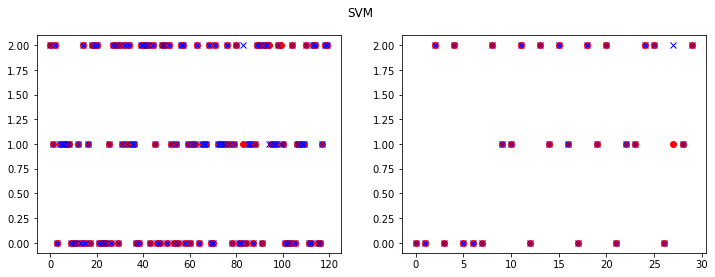

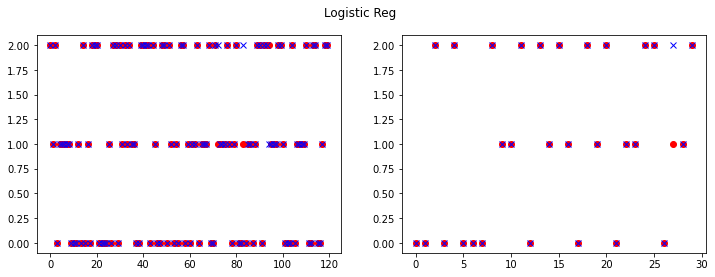

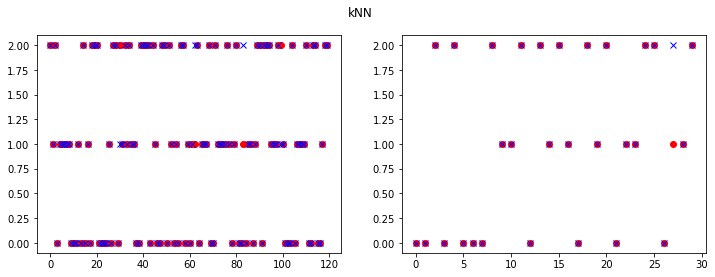

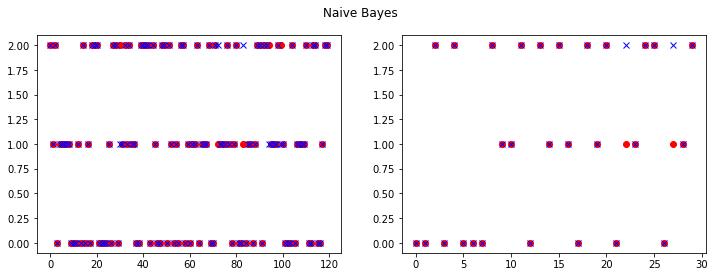

In [79]:
# TODO 1
# list of algorithms to test
models = [  svm, logreg, knn, nb]
# list of algorithm names 
names = [  "SVM", "Logistic Reg", "kNN", "Naive Bayes"]


for name, model in zip(names, models):
    print(name)
    
    # TODO 3:
    clf =Pipeline([('StandardScaler',StandardScaler()),(name,model)])

    # TODO 4:
    clf.fit(X_train,t_train)
    
    # TODO 5:
    test_score=clf.score(X_test,t_test)
    train_score=clf.score(X_train,t_train)
    print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))
    
    
    
    # TODO 6:
    y_train = clf.predict(X_train)
    y_test = clf.predict(X_test)

    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    # TODO 7:

    plt.plot(t_train,'ro')
    plt.plot(y_train,'bx')
    
    
    plt.subplot(122)
    # TODO 8:

    plt.plot(t_test,'ro')
    plt.plot(y_test,'bx')
    
    plt.suptitle(name)

`TODO12.3` Do you observe any difference? What do you think about the results? 

`ANSWER`
On average they performed better than when using the one vs rest.

# Breast Cancer Detection

Now, let us apply all the classifiers to breast cancer detection problem. The problem is binary classification, so we do not need multiclass conversion. 

<div id="TODO13"></div>


### TODO13 (13 points)

1. Partition the `cancer` data using our train/test split function defined ealier.
2. Create a list of instances containing each of the classifiers like we did in TODO11 and name this list `models`.
3. Repeat the fit/evalution/plotting as in previous TODO's.
  1. Fit the current `model` using the train data and labels.
  1. Compute the accuracy of the learned classifier using the train/test data and labels and appending them to `train_accs` and `test_accs`
  1. Compute the triain and test predictions.
  1. Plot the train labels using the 'ro' marker, y_train using the 'bx' marker.
  1. Plot the test labels using the 'ro' marker, y_train using the 'bx' marker.
4. Plot a bar chart that compares the train and test accuracies of all the algorithms.
5. State what you observed. 

In [97]:
# Data preparation

# TODO 1 data partition
X_train, X_test, t_train, t_test = train_test_split(cancer.data,cancer.target, test_size=0.2)

Ridge
Train Accuracy: 0.967032967032967, Test Accuracy: 0.9649122807017544
Perceptron
Train Accuracy: 0.9802197802197802, Test Accuracy: 0.9649122807017544
SGD
Train Accuracy: 0.9758241758241758, Test Accuracy: 0.9824561403508771
SVM
Train Accuracy: 0.989010989010989, Test Accuracy: 0.9824561403508771
LogReg
Train Accuracy: 0.9912087912087912, Test Accuracy: 0.9736842105263158
kNN
Train Accuracy: 0.9802197802197802, Test Accuracy: 0.9649122807017544
NaiveBayes
Train Accuracy: 0.9384615384615385, Test Accuracy: 0.9385964912280702


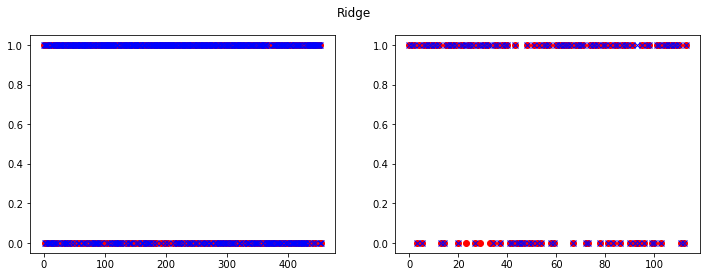

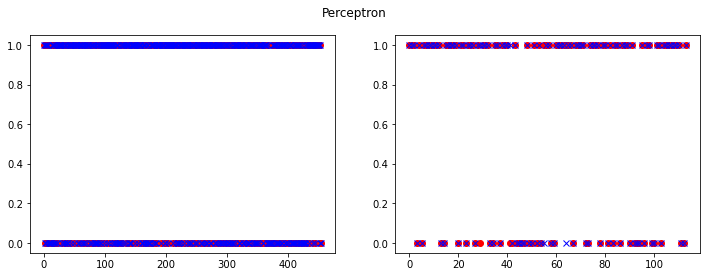

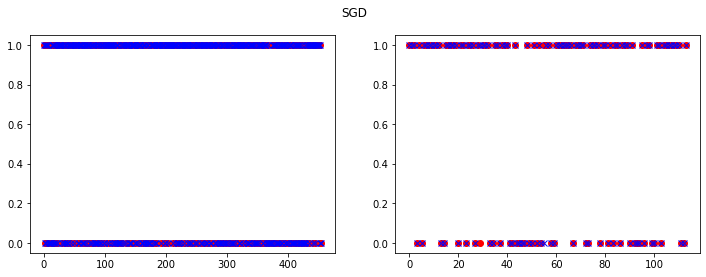

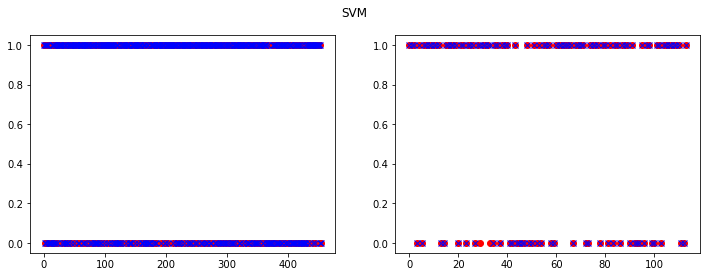

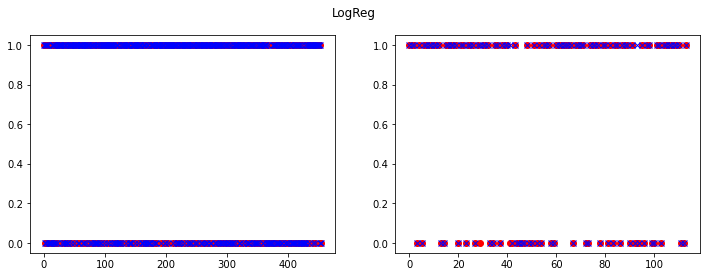

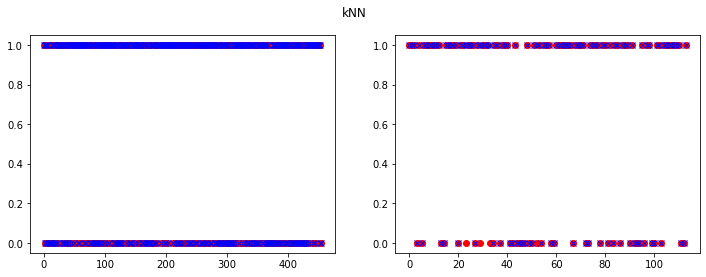

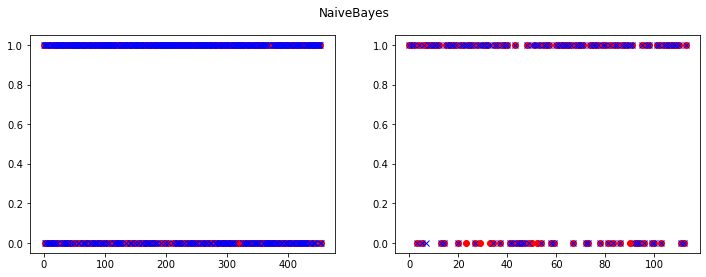

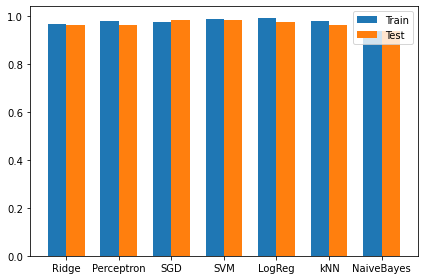

In [98]:
# TODO 2
ridge = Ridge()
perceptron = Perceptron()
sgd = SGDClassifier()
svm = SVC()
logreg = LogisticRegression()
knn = KNeighborsClassifier()
nb = naive_bayes.GaussianNB()
models = [ ridge, perceptron, sgd, svm, logreg, knn, nb]
names = ["Ridge", "Perceptron", "SGD", "SVM", "LogReg", "kNN", "NaiveBayes"]

train_accs = []
test_accs = []

for name, model in zip(names, models):
    print(name)
    
    # TODO 3:
    clf =Pipeline([('StandardScaler',StandardScaler()),(name,OneVsRestClassifier(model))])

    # TODO 4:
    clf.fit(X_train,t_train)
    
    # TODO 5:
    test_score=clf.score(X_test,t_test)
    train_score=clf.score(X_train,t_train)
    train_accs.append(train_score)
    test_accs.append(test_score)
    print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))
    
    
    
    # TODO 6:
    y_train = clf.predict(X_train)
    y_test = clf.predict(X_test)

    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    # TODO 7:

    plt.plot(t_train,'ro')
    plt.plot(y_train,'bx')
    
    
    plt.subplot(122)
    # TODO 8:

    plt.plot(t_test,'ro')
    plt.plot(y_test,'bx')
    
    plt.suptitle(name)

    
    
    
    
    
    

    
# TODO 4    
x = np.arange(len(names))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x - width/2,train_accs,width,label='Train')

ax.bar(x + width/2,test_accs,width,label='Test')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()
fig.tight_layout()

plt.show()


`TODO13.5`  What algorithm works best in breast cancer data? What do you observe from the result and what you think about them? 

`ANSWER`
SVM works best for breast cancer data. Overall all models work well for the cancer data this means that you could use basically any of them and get roughly the same result.

<div id="TODO18"></div>

## Feedback (2 point)

Did you enjoy the lab? 

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER` 4 some of the early todos felt a little redundent. ie todo 2 if a student doesnt know how to do that by now in the semester they are doing something wrong.

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER` overall lab was very clear and easy to work with

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER` all concepts were explained well